In [1]:
import numpy as np
import pandas as pd
import os
import re
from tqdm import tqdm
import ast
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
!pip install seaborn

In [3]:
import sys
sys.version

'3.7.16 (default, Jan 17 2023, 22:20:44) \n[GCC 11.2.0]'

# Fonctions

In [4]:
def clean_text(text):
    
    text2 = re.sub('!','.',text)
    text2 = re.sub(' \...',' ',text)
    text2 = re.sub('  ',' ',text2)
    char  = [';',':','!','«','»',',','“','”','(',')']
    pattern = '[' + ''.join(char) + ']'
    new_str = re.sub(pattern,'', text2)
    #clean_words = [word for word in new_str.split() if word.lower() not in stopwords_latin]
    #new_str = ' '.join(clean_words)
    new_str = re.sub(r'\? [A-Z]','.',new_str)
    new_str = re.sub(r'\?','',new_str)
    pattern = r"\. ([a-z])"
    new_str = re.sub(pattern, r" \1", new_str)
    string = new_str.split('.')
    string = [x for x in string if x != '']
    string = [x for x in string if x != ' ']
    string = [x.lower() for x in string]
    string = [x.lstrip() for x in string]
    string = [x.rstrip() for x in string]
    string = [re.sub('v','u',x) for x in string]
    string = [re.sub('j','i',x) for x in string]
    
    return string

In [5]:
def clean_text_stopwords(text):
    
    text2 = re.sub('!','.',text)
    text2 = re.sub(' \...',' ',text)
    text2 = re.sub('  ',' ',text2)
    char  = [';',':','!','«','»',',','“','”']
    pattern = '[' + ''.join(char) + ']'
    new_str = re.sub(pattern,'', text2)
    clean_words = [word for word in new_str.split() if word.lower() not in stopwords_latin]
    new_str = ' '.join(clean_words)
    new_str = re.sub(r'\? [A-Z]','.',new_str)
    new_str = re.sub(r'\?','',new_str)
    pattern = r"\. ([a-z])"
    new_str = re.sub(pattern, r" \1", new_str)
    string = new_str.split('.')
    string = [x for x in string if x != '']
    string = [x for x in string if x != ' ']
    string = [x.lower() for x in string]
    string = [x.lstrip() for x in string]
    string = [x.rstrip() for x in string]
    string = [re.sub('v','u',x) for x in string]
    string = [re.sub('j','i',x) for x in string]
    
    return string

In [6]:
def remove_words(sentence, words_to_remove):
    for word in words_to_remove:
        sentence = re.sub(r'\b{}\b'.format(word), '', sentence)
        sentence = re.sub("  "," ",sentence)
    return sentence.strip()

In [7]:
def compare_sentences(sentence_1, sentence_2):
    words_1 = sentence_1.lower().split()
    words_2 = sentence_2.lower().split()

    common_words = set(words_1) & set(words_2)

    return len(common_words) >= 2

In [8]:
def distance_index(text, word1, word2, max_distance=10):
    words = text.split()
    index1 = None
    index2 = None

    for i, word in enumerate(words):
        if word == word1:
            index1 = i
        elif word == word2:
            index2 = i

    if index1 is not None and index2 is not None:
        distance = abs(index2 - index1)
        if distance <= max_distance:
            return True
        else:
            return False
    else:
        return False

In [9]:
def create_bigrams(sentence):
    words = sentence.split()
    bigrams = [(words[i], words[i+1]) for i in range(len(words) - 1)]
    return bigrams

In [10]:
def substitute_keys(dict1, dict2):
    result_dict = {}

    for key1 in dict1.keys():
        
        for value2 in dict2.values():
           
            if value2 == key1:
                
                for key2, value2_2 in dict2.items():
                    if value2_2 == value2:

                        result_dict[key2] = dict1[key1]
                        break  

    return result_dict

In [11]:
def transform_sentences_to_keys(dict1, dict2):
    # Create a new dictionary to store the result
    result_dict = {}

    # Iterate through the keys and sentences in dict1
    for key1, sentences_list1 in dict1.items():
        # Initialize a list to store matching keys from dict2
        keys_list = []
        for sentence1 in sentences_list1:
            # Find the matching key from dict2 for the current sentence1
            for key2, sentence2 in dict2.items():
                if sentence1 == sentence2:
                    keys_list.append(key2)

        # Add the list of keys corresponding to sentences in dict1 to the result_dict
        result_dict[key1] = keys_list

    return result_dict

In [12]:
def from_bigrams_to_sentence(bigram): 

    test = []

    i = 0

    while i <= len(bigram)-1:
        test.append(bigram[i][0])
        i += 1
        
    test.append(bigram[-1][-2])
    test.append(bigram[-1][-1])

    final  = " ".join(test)
    
    return final

In [13]:
matches = {}

def comparaison_bi_grams(bigram):   
    #bigram = pdv_bigrams[0]

    liste_vide = []

    for i in bigram:

        for test in guerin_bigrams:

            if i in test:
                liste_vide.append(from_bigrams_to_sentence(test))
                matches[from_bigrams_to_sentence(bigram)] = liste_vide

In [14]:
def create_trigrams(sentence):
    words = sentence.split()
    trigrams = [(words[i], words[i+1], words[i+2]) for i in range(len(words) - 2)]
    return trigrams

In [15]:
def from_trigrams_to_sentence(trigram): 

    test = []

    i = 0

    while i <= len(trigram)-1:
        test.append(trigram[i][0])
        i += 1
    test.append(trigram[-1][-2])
    test.append(trigram[-1][-1])

    final  = " ".join(test)
    
    return final

In [16]:
matches_trigrams = {}

def comparaison_trigrams(trigram):   
    #bigram = pdv_bigrams[0]

    liste_vide = []

    for i in trigram:

        for test in guerin_trigrams:

            if i in test:
                liste_vide.append(from_trigrams_to_sentence(test))
                matches_trigrams[from_trigrams_to_sentence(trigram)] = liste_vide

In [17]:
def remove_duplicates_from_dict_values(dictionary):
    for key, value_list in dictionary.items():
        # Convert the value list to a set to remove duplicates, then back to a list
        dictionary[key] = list(set(value_list))
    return dictionary

In [18]:
def create_quadrigrams(sentence):
    words = sentence.split()
    quadrigrams = [(words[i], words[i+1], words[i+2], words[i+3]) for i in range(len(words) - 3)]
    return quadrigrams

In [19]:
def from_quadrigrams_to_sentence(quadrigram): 

    test = []

    i = 0

    while i <= len(quadrigram)-1:
        test.append(quadrigram[i][0])
        i += 1
    
    test.append(quadrigram[-1][-3])
    test.append(quadrigram[-1][-2])
    test.append(quadrigram[-1][-1])

    final  = " ".join(test)
    
    return final

In [20]:
matches_quadrigrams = {}

def comparaison_quadrigrams(quadrigram):   
    #bigram = pdv_bigrams[0]

    liste_vide = []

    for i in quadrigram:

        for test in guerin_quadrigrams:

            if i in test:
                liste_vide.append(from_quadrigrams_to_sentence(test))
                matches_quadrigrams[from_quadrigrams_to_sentence(quadrigram)] = liste_vide           

In [21]:
def create_quintigrams(sentence):
    words = sentence.split()
    quintigrams = [(words[i], words[i+1], words[i+2], words[i+3], words[i+4]) for i in range(len(words) - 4)]
    return quintigrams

In [22]:
def from_quintigrams_to_sentence(quintigram): 

    test = []

    i = 0

    while i <= len(quintigram)-1:
        test.append(quintigram[i][0])
        i += 1
    
    test.append(quintigram[-1][-4])
    test.append(quintigram[-1][-3])
    test.append(quintigram[-1][-2])
    test.append(quintigram[-1][-1])

    final  = " ".join(test)
    
    return final

In [23]:
matches_quintigrams = {}

def comparaison_quintigrams(quintigram):   
    #bigram = pdv_bigrams[0]

    liste_vide = []

    for i in quintigram:

        for test in guerin_quintigrams:

            if i in test:
                liste_vide.append(from_quintigrams_to_sentence(test))
                matches_quintigrams[from_quintigrams_to_sentence(quintigram)] = liste_vide             

In [24]:
def delete_empty_values(dictionary):
    keys_to_delete = []
    for key, value in dictionary.items():
        if not value:
            keys_to_delete.append(key)
    for key in keys_to_delete:
        dictionary.pop(key)
def remove_character_from_values(dictionary, character):
    for key, value in dictionary.items():
        if isinstance(value, str):
            dictionary[key] = value.replace(character, '')

# Préparation des dictionnaires avec les indices et les phrases de chaque corpus

In [25]:
file = '/home/noe/Documents/2022-2023/ENC/Mémoire/Dataframes/PDV_grams.xlsx'
guerin = '/home/noe/Documents/2022-2023/ENC/Mémoire/Dataframes/Guerin_grams.xlsx'

In [26]:
os.chdir('/home/noe/Documents/2022-2023/ENC/Mémoire/Comparaison_de_mots/')

In [27]:
df_PDV = pd.read_excel(file)

In [28]:
stopwords_latin = ['©','quod','et','a', 'ab', 'ac', 'ad', 'adhic', 'aliqua', 'aliquae', 'aliquam', 'aliqui', 'aliquis', 'an', 'ante', 'apud', 'at', 'atque', 'aut', 'autem', 'cetera', 'ceterae', 'ceteri', 'ceteris', 'cetero', 'ceterorum', 'ceteros', 'ceterum', 'ceterus', 'cum', 'cur', 'de', 'deinde', 'dum', 'ea', 'eae', 'eam', 'earum', 'eas', 'eis', 'eo', 'eorum', 'eos', 'eum', 'eundem', 'eumdem', 'ex', 'fio', 'haec', 'hanc', 'hic', 'hoc', 'huc', 'iam', 'idem', 'igitur', 'ii', 'iis', 'ille', 'illius', 'in', 'infra', 'inter', 'interim', 'ipse', 'ipsa', 'ipsam', 'ipsis', 'ipsius', 'ipsorum', 'ipsos', 'ita', 'magis', 'modo', 'mox', 'nam', 'ne', 'nec', 'necne', 'necque', 'neque', 'nisi', 'non', 'nos', 'nostra', 'nostrae', 'nostram', 'nostri', 'nostris', 'notre', 'o', 'ob', 'per', 'possum', 'post', 'pro', 'quae', 'quam', 'quare', 'qui', 'quia', 'quibus', 'quid', 'quidem', 'quin', 'quis', 'quisnam', 'quisquam', 'quisque', 'quo', 'quoniam', 'sed', 'si', 'sibi', 'sic', 'sicut', 'sine', 'sive', 'sub', 'sua', 'suam', 'sui', 'suis', 'sum', 'super', 'supra', 'suus', 'tam', 'tamen', 'trans', 'tu', 'tua', 'tunc', 'tuo', 'tuos', 'tuus', 'ubi', 'uel', 'uelut', 'uero', 'unus', 'ut']

# Ajout des déterminants de la liste précédente
stopwords_latin += ['mei', 'tui', 'sui', 'nostri', 'vestri', 'suus', 'meus', 'tuus', 'noster', 'vester', 'eius', 'eae', 'ea', 'eum', 'eam', 'eos', 'eas', 'id', 'is', 'illa', 'illud', 'illi', 'illis', 'ipsum', 'ipsam', 'ipsa', 'ipsi', 'ipsis', 'idem', 'eadem', 'idemque', 'eademque']


In [29]:
df = pd.DataFrame({'texts':df_PDV['textes'],'clean_PDV': df_PDV['textes'].apply(clean_text)})

In [30]:
df_guerin = pd.read_excel(guerin)

In [31]:
pdv = {}
for i in range(len(df)):
    for sentence in df['clean_PDV'][i]:
        pdv[ f'pdv_{i+1}_{df["clean_PDV"][i].index(sentence)+1}'] = sentence

In [32]:
df2 = pd.DataFrame({'guerin_texts':df_guerin['text'],'clean_guerin':df_guerin['text'].apply(clean_text),
                   'guerin_stop': df_guerin['text'].apply(clean_text_stopwords)})

In [33]:
column_without_brackets = [[string.replace('[', '').replace(']', '').lstrip().rstrip() for string in sublist] for sublist in df2['clean_guerin']]

In [34]:
df2['clean'] = column_without_brackets

In [35]:
guerin = {}
for i in range(len(df2)):
    for sentence in df2['clean'][i]:        
        guerin[f'guerin_{i+1}_{df2["clean"][i].index(sentence)+1}'] = sentence

In [36]:
viard = '/home/noe/Documents/2022-2023/ENC/Mémoire/Dataframes/Viard_grams.xlsx'
df_viard = pd.read_excel(viard)

In [37]:
df3 = pd.DataFrame({'clean_viard':df_viard['text'].apply(clean_text)})

In [38]:
viard = {}

for i in range(len(df3)):
    for sentence in df3['clean_viard'][i]:
        viard[f'viard_{i+1}_{df3["clean_viard"][i].index(sentence)+1}'] = sentence

In [39]:
pdv_2 = {key: remove_words(value,stopwords_latin) for key, value in pdv.items()}
guerin_2 = {key: remove_words(value,stopwords_latin) for key, value in guerin.items()}

In [40]:
remove_character_from_values(pdv_2,'©')
remove_character_from_values(pdv_2,'|')
delete_empty_values(pdv_2)

In [41]:
remove_character_from_values(guerin_2,'©')
remove_character_from_values(guerin_2,'|')
delete_empty_values(guerin_2)

In [42]:
x = list(pdv_2.values())

In [43]:
y = list(guerin_2.values())

In [44]:
from typing import List
from pie_extended.cli.utils import get_tagger, get_model, download

# In case you need to download
do_download = False
if do_download:
    for dl in download("lasla"):
        x = 1

# model_path allows you to override the model loaded by another .tar
model_name = "lasla"
tagger = get_tagger(model_name, batch_size=256, device="cpu", model_path=None)

liste_dic_guerin = []
for i in tqdm(range(len(y))):
    sentences: List[str] = [y[i]]
    # Get the main object from the model (: data iterator + postprocesor
    from pie_extended.models.lasla.imports import get_iterator_and_processor
    for sentence_group in sentences:
        iterator, processor = get_iterator_and_processor()
        dic = tagger.tag_str(sentence_group, iterator=iterator, processor=processor)
        liste_dic_guerin.append(dic)

fatal: HEAD n'est pas un nom d'objet valide
100%|███████████████████████████████████████| 4041/4041 [12:29<00:00,  5.39it/s]


In [45]:
from typing import List
from pie_extended.cli.utils import get_tagger, get_model, download

# In case you need to download
do_download = False
if do_download:
    for dl in download("lasla"):
        x = 1

# model_path allows you to override the model loaded by another .tar
model_name = "lasla"
tagger = get_tagger(model_name, batch_size=256, device="cpu", model_path=None)

liste_dic = []
for i in tqdm(range(len(x))):
    sentences: List[str] = [x[i]]
    # Get the main object from the model (: data iterator + postprocesor
    from pie_extended.models.lasla.imports import get_iterator_and_processor
    for sentence_group in sentences:
        iterator, processor = get_iterator_and_processor()
        dic = tagger.tag_str(sentence_group, iterator=iterator, processor=processor)
        liste_dic.append(dic)

100%|███████████████████████████████████████| 2048/2048 [06:17<00:00,  5.42it/s]


In [46]:
list(pdv_2.items())[1460]

('pdv_206_1',
 'impunitatem criminum coalescat insolentia peruersorum fidelitati tuae mandamus quatenus illos quasdam segetes discreti uiri')

In [47]:
liste_finale_guerin = []

for i in tqdm(liste_dic_guerin):
    liste_sentence = []
    for j in i:
        liste_sentence.append(j.get('lemma'))
    liste_finale_guerin.append(liste_sentence)
    


100%|███████████████████████████████████| 4041/4041 [00:00<00:00, 156759.79it/s]


In [48]:
liste_finale = []

for i in tqdm(liste_dic):
    liste_sentence = []
    for j in i:
        liste_sentence.append(j.get('lemma'))
    liste_finale.append(liste_sentence)

100%|███████████████████████████████████| 2048/2048 [00:00<00:00, 101617.55it/s]


In [49]:
liste_finale = [' '.join(sublist) for sublist in liste_finale]
liste_finale_guerin = [' '.join(sublist) for sublist in liste_finale_guerin]

In [50]:
pdv_lemma = {key: value for key, value in zip(list(pdv_2.keys()), liste_finale)}
guerin_lemma = {key: value for key, value in zip(list(guerin_2.keys()), liste_finale_guerin)}

# Méthode deux pour les correspondances de bi-tr-quadri-quinti grams

100%|███████████████████████████████████████| 363/363 [00:00<00:00, 2870.12it/s]


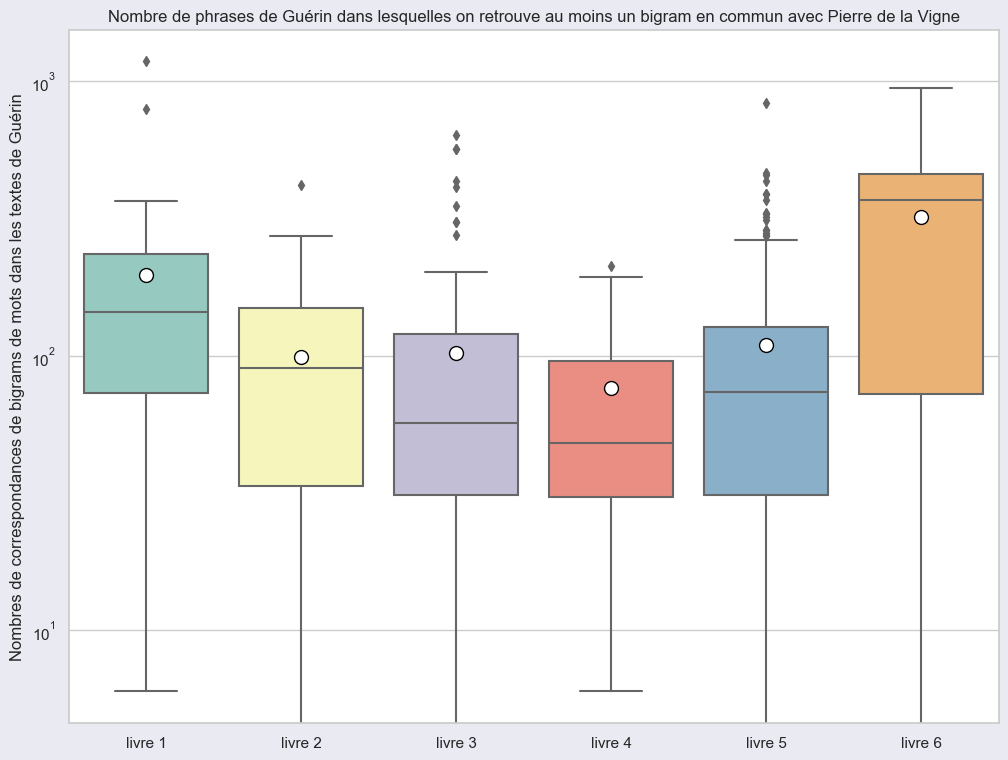

In [51]:
complete_list = []
match_bi = {}

for i in tqdm(list(pdv_lemma.keys())):
    big = create_bigrams(pdv_lemma.get(i))
    correspondance = []
    lesgrams = []

    for key in list(guerin_lemma.keys()):
        liste_bigrams = create_bigrams(guerin_lemma.get(key))
        for bigram in big:
            if bigram in liste_bigrams:
                correspondance.append(key)
                lesgrams.append(bigram)
                break
                
    match_bi[i] = correspondance
delete_empty_values(match_bi)

count_match = {}

for key, value in match_bi.items():
    count_match[key] = len(value)

count_sentences_match = {}
#nombre de phrases qui ont au moins un bigramme similaire avec une phrase de guérin. 

for i in tqdm(range(363)):
    filtered_dict = {key: value for key, value in count_match.items() if key.startswith(f"pdv_{i+1}_")}
    count_sentences_match[f'pdv_{i+1}'] = sum(filtered_dict.values())

keys = list(count_sentences_match.keys())
values = list(count_sentences_match.values())

livre_1 = {}
livre_2 = {}
livre_3 = {}
livre_4 = {}
livre_5 = {}
livre_6 = {}

for i in range(len(keys)):
    if i < 33:
        livre_1[keys[i]] = values[i]
    if 32 < i < 92:
        livre_2[keys[i]] = values[i]
    if 91 < i < 179:
        livre_3[keys[i]] = values[i]
    if 178 < i < 195:
        livre_4[keys[i]] = values[i]
    if 194 < i < 331:
        livre_5[keys[i]] = values[i]
    if 330 < i < 364:
        livre_6[keys[i]] = values[i]
        
one = list(livre_1.values())
two = list(livre_2.values())
three = list(livre_3.values())
four = list(livre_4.values())
five = list(livre_5.values())
six = list(livre_6.values())
liste_livres = [one, two, three, four, five, six]

sns.set(style="whitegrid")
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(12, 9), facecolor=facecolor)
sns.boxplot(data=liste_livres, palette="Set3",showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.yscale("log")
ax.set_ylabel('Nombres de correspondances de bigrams de mots dans les textes de Guérin', 
              fontsize=12)
custom_labels = ['livre 1','livre 2','livre 3','livre 4','livre 5','livre 6']
plt.xticks(range(len(custom_labels)), custom_labels)
plt.title('Nombre de phrases de Guérin dans lesquelles on retrouve au moins un bigram en commun avec Pierre de la Vigne')

liste_bigrams = [sum(livre_1.values()),sum(livre_2.values()),sum(livre_3.values()),
                     sum(livre_4.values()),sum(livre_5.values()),sum(livre_6.values())]


In [52]:
liste_bigrams = [sum(livre_1.values()),sum(livre_2.values()),sum(livre_3.values()),
                     sum(livre_4.values()),sum(livre_5.values()),sum(livre_6.values())]

In [53]:
complete_list_tri = []
match_tri = {}

for i in tqdm(list(pdv_lemma.keys())):
    big = create_trigrams(pdv_lemma.get(i))
    correspondance = []
    lesgrams = []

    for key in list(guerin_lemma.keys()):
        liste_trigrams = create_trigrams(guerin_lemma.get(key))
        for trigram in big:
            if trigram in liste_trigrams:
                correspondance.append(key)
                lesgrams.append(trigram)
                break
                
    match_tri[i] = correspondance
delete_empty_values(match_tri)

count_match_tri = {}

for key, value in match_tri.items():
    count_match_tri[key] = len(value)

count_sentences_match_tri = {}
#nombre de phrases qui ont au moins un bigramme similaire avec une phrase de guérin. 

for i in tqdm(range(363)):
    filtered_dict = {key: value for key, value in count_match_tri.items() if key.startswith(f"pdv_{i+1}_")}
    count_sentences_match_tri[f'pdv_{i+1}'] = sum(filtered_dict.values())

keys = list(count_sentences_match_tri.keys())
values = list(count_sentences_match_tri.values())

livre_1 = {}
livre_2 = {}
livre_3 = {}
livre_4 = {}
livre_5 = {}
livre_6 = {}

for i in range(len(keys)):
    if i < 33:
        livre_1[keys[i]] = values[i]
    if 32 < i < 92:
        livre_2[keys[i]] = values[i]
    if 91 < i < 179:
        livre_3[keys[i]] = values[i]
    if 178 < i < 195:
        livre_4[keys[i]] = values[i]
    if 194 < i < 331:
        livre_5[keys[i]] = values[i]
    if 330 < i < 364:
        livre_6[keys[i]] = values[i]
        
one = list(livre_1.values())
two = list(livre_2.values())
three = list(livre_3.values())
four = list(livre_4.values())
five = list(livre_5.values())
six = list(livre_6.values())
liste_livres = [one, two, three, four, five, six]

"""sns.set(style="whitegrid")
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(12, 9), facecolor=facecolor)
sns.boxplot(data=liste_livres, palette="Set3",showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.yscale("log")
ax.set_ylabel('Nombres de correspondances de bigrams de mots dans les textes de Guérin', 
              fontsize=12)
custom_labels = ['livre 1','livre 2','livre 3','livre 4','livre 5','livre 6']
plt.xticks(range(len(custom_labels)), custom_labels)
plt.title('Nombre de phrases de Guérin dans lesquelles on retrouve au moins un bigram en commun avec Pierre de la Vigne')

"""
liste_trigrams = [sum(livre_1.values()),sum(livre_2.values()),sum(livre_3.values()),
                     sum(livre_4.values()),sum(livre_5.values()),sum(livre_6.values())]

100%|██████████████████████████████████████| 363/363 [00:00<00:00, 18095.87it/s]


In [54]:
liste_trigrams

[61, 67, 95, 5, 242, 2110]

In [55]:
complete_list_quadri = []
match_quadri = {}

for i in tqdm(list(pdv_lemma.keys())):
    big = create_quadrigrams(pdv_lemma.get(i))
    correspondance = []
    lesgrams = []

    for key in list(guerin_lemma.keys()):
        liste_quadrigrams = create_quadrigrams(guerin_lemma.get(key))
        for quadri in big:
            if quadri in liste_quadrigrams:
                correspondance.append(key)
                lesgrams.append(quadri)
                break
                
    match_quadri[i] = correspondance
delete_empty_values(match_quadri)

count_match_quadri = {}

for key, value in match_quadri.items():
    count_match_quadri[key] = len(value)

count_sentences_match_quadri = {}
#nombre de phrases qui ont au moins un bigramme similaire avec une phrase de guérin. 

for i in tqdm(range(363)):
    filtered_dict = {key: value for key, value in count_match_quadri.items() if key.startswith(f"pdv_{i+1}_")}
    count_sentences_match_quadri[f'pdv_{i+1}'] = sum(filtered_dict.values())

keys = list(count_sentences_match_quadri.keys())
values = list(count_sentences_match_quadri.values())

livre_1 = {}
livre_2 = {}
livre_3 = {}
livre_4 = {}
livre_5 = {}
livre_6 = {}

for i in range(len(keys)):
    if i < 33:
        livre_1[keys[i]] = values[i]
    if 32 < i < 92:
        livre_2[keys[i]] = values[i]
    if 91 < i < 179:
        livre_3[keys[i]] = values[i]
    if 178 < i < 195:
        livre_4[keys[i]] = values[i]
    if 194 < i < 331:
        livre_5[keys[i]] = values[i]
    if 330 < i < 364:
        livre_6[keys[i]] = values[i]
        
one = list(livre_1.values())
two = list(livre_2.values())
three = list(livre_3.values())
four = list(livre_4.values())
five = list(livre_5.values())
six = list(livre_6.values())
liste_livres = [one, two, three, four, five, six]

"""sns.set(style="whitegrid")
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(12, 9), facecolor=facecolor)
sns.boxplot(data=liste_livres, palette="Set3",showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.yscale("log")
ax.set_ylabel('Nombres de correspondances de bigrams de mots dans les textes de Guérin', 
              fontsize=12)
custom_labels = ['livre 1','livre 2','livre 3','livre 4','livre 5','livre 6']
plt.xticks(range(len(custom_labels)), custom_labels)
plt.title('Nombre de phrases de Guérin dans lesquelles on retrouve au moins un bigram en commun avec Pierre de la Vigne')
"""

liste_quadrigrams = [sum(livre_1.values()),sum(livre_2.values()),sum(livre_3.values()),
                     sum(livre_4.values()),sum(livre_5.values()),sum(livre_6.values())]

100%|█████████████████████████████████████| 363/363 [00:00<00:00, 202088.18it/s]


In [56]:
complete_list_quinti = []
match_quinti = {}

for i in tqdm(list(pdv_lemma.keys())):
    big = create_quintigrams(pdv_lemma.get(i))
    correspondance = []
    lesgrams = []

    for key in list(guerin_lemma.keys()):
        liste_quintigrams = create_quintigrams(guerin_lemma.get(key))
        for quinti in big:
            if quinti in liste_quintigrams:
                correspondance.append(key)
                lesgrams.append(quinti)
                break
                
    match_quinti[i] = correspondance
delete_empty_values(match_quinti)

count_match_quinti = {}

for key, value in match_quinti.items():
    count_match_quinti[key] = len(value)

count_sentences_match_quinti = {}
#nombre de phrases qui ont au moins un bigramme similaire avec une phrase de guérin. 

for i in tqdm(range(363)):
    filtered_dict = {key: value for key, value in count_match_quinti.items() if key.startswith(f"pdv_{i+1}_")}
    count_sentences_match_quinti[f'pdv_{i+1}'] = sum(filtered_dict.values())

keys = list(count_sentences_match_quinti.keys())
values = list(count_sentences_match_quinti.values())

livre_1 = {}
livre_2 = {}
livre_3 = {}
livre_4 = {}
livre_5 = {}
livre_6 = {}

for i in range(len(keys)):
    if i < 33:
        livre_1[keys[i]] = values[i]
    if 32 < i < 92:
        livre_2[keys[i]] = values[i]
    if 91 < i < 179:
        livre_3[keys[i]] = values[i]
    if 178 < i < 195:
        livre_4[keys[i]] = values[i]
    if 194 < i < 331:
        livre_5[keys[i]] = values[i]
    if 330 < i < 364:
        livre_6[keys[i]] = values[i]
        
one = list(livre_1.values())
two = list(livre_2.values())
three = list(livre_3.values())
four = list(livre_4.values())
five = list(livre_5.values())
six = list(livre_6.values())
liste_livres = [one, two, three, four, five, six]
"""
sns.set(style="whitegrid")
facecolor = '#eaeaf2'
fig, ax = plt.subplots(figsize=(12, 9), facecolor=facecolor)
sns.boxplot(data=liste_livres, palette="Set3",showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.yscale("log")
ax.set_ylabel('Nombres de correspondances de bigrams de mots dans les textes de Guérin', 
              fontsize=12)
custom_labels = ['livre 1','livre 2','livre 3','livre 4','livre 5','livre 6']
plt.xticks(range(len(custom_labels)), custom_labels)
plt.title('Nombre de phrases de Guérin dans lesquelles on retrouve au moins un bigram en commun avec Pierre de la Vigne')"""


liste_quintigrams = [sum(livre_1.values()),sum(livre_2.values()),sum(livre_3.values()),
                     sum(livre_4.values()),sum(livre_5.values()),sum(livre_6.values())]

100%|█████████████████████████████████████| 363/363 [00:00<00:00, 576498.43it/s]


In [57]:
data = [liste_bigrams,liste_trigrams,liste_quadrigrams,liste_quintigrams]

columns = ('livre 1', 'livre 2', 'livre 3', 'livre 4', 'livre 5', 'livre 6')

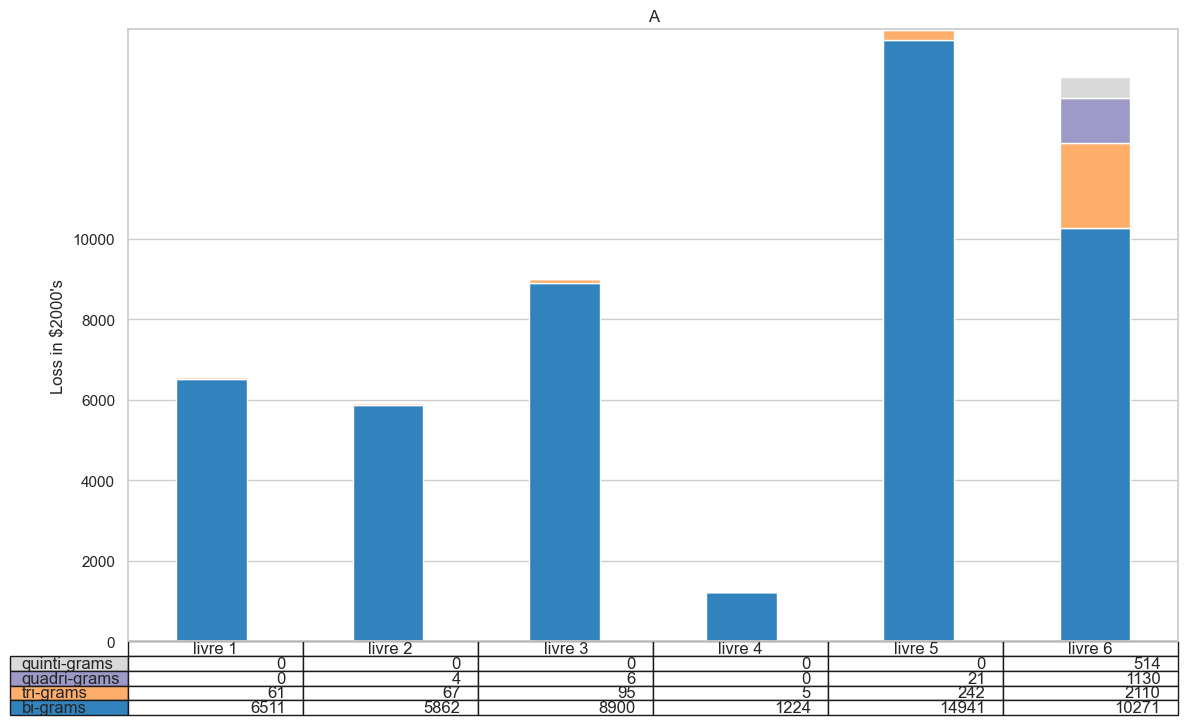

In [58]:


sns.set(style="whitegrid")
facecolor = '#eaeaf2'
data = data

columns = ('livre 1', 'livre 2', 'livre 3', 'livre 4', 'livre 5', 'livre 6')
rows = [x for x in ('quinti-grams', 'quadri-grams', 'tri-grams', 'bi-grams')
]

plt.figure(figsize=(15,9))

values = np.arange(0, 10001, 2000)
value_increment = 2000

# Get some pastel shades for the colors
colors = plt.cm.tab20c(np.linspace(0, 1, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%d' % x for x in data[row]])

# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel(f"Loss in ${value_increment}'s")

plt.yticks(values, ['%d' % val for val in values])
plt.xticks([])
plt.title('A')


plt.show()


In [59]:
data

[[6511, 5862, 8900, 1224, 14941, 10271],
 [61, 67, 95, 5, 242, 2110],
 [0, 4, 6, 0, 21, 1130],
 [0, 0, 0, 0, 0, 514]]

In [390]:
df = pd.DataFrame(match_bi)

ValueError: All arrays must be of the same length

In [103]:
match_bi

{'pdv_1_1': ['guerin_324_22'],
 'pdv_1_2': ['guerin_174_5',
  'guerin_185_3',
  'guerin_253_9',
  'guerin_254_10',
  'guerin_283_9',
  'guerin_284_10',
  'guerin_346_4'],
 'pdv_1_6': ['guerin_191_11', 'guerin_223_33'],
 'pdv_1_7': ['guerin_82_9',
  'guerin_123_2',
  'guerin_240_2',
  'guerin_265_2',
  'guerin_267_16',
  'guerin_302_2',
  'guerin_321_6',
  'guerin_322_7'],
 'pdv_1_10': ['guerin_15_3',
  'guerin_25_6',
  'guerin_25_10',
  'guerin_25_50',
  'guerin_42_21',
  'guerin_59_5',
  'guerin_73_6',
  'guerin_96_5',
  'guerin_105_27',
  'guerin_126_4',
  'guerin_131_3',
  'guerin_132_3',
  'guerin_153_10',
  'guerin_170_4',
  'guerin_170_9',
  'guerin_171_32',
  'guerin_180_7',
  'guerin_182_2',
  'guerin_182_10',
  'guerin_184_9',
  'guerin_188_9',
  'guerin_197_7',
  'guerin_211_3',
  'guerin_218_3',
  'guerin_220_19',
  'guerin_222_3',
  'guerin_223_3',
  'guerin_223_51',
  'guerin_224_8',
  'guerin_230_5',
  'guerin_231_11',
  'guerin_234_9',
  'guerin_238_8',
  'guerin_250_2',

In [88]:
def get_common_grams(phrase1,phrase2):
    
    big1 = create_bigrams(phrase1)
    big2 = create_bigrams(phrase2)
    
    common = []
    
    for bigram in big1:
        if bigram in big2:
            common.append(bigram)
    return common

In [95]:
get_common_grams(pdv_lemma.get('pdv_1_1'),guerin_lemma.get('guerin_324_22'))

[('christianus1', 'dominus')]

In [288]:
imperial = 'nos enim qui pondus incudis hactenus patienter et deuote subiuimus uolentes ulterius per patientam notsram ledi de cetero pati nequimus quin causam nostram defendendo uiriliter mallei consequentur officium adsumanmus'
anglais = 'nos qui pondus incudis patienter et diu portauimus mallei officium assumere compellimur'

In [391]:
len(imperial.split())

29

In [289]:
liste_commune = get_common_grams(imperial,anglais)
liste_commune

[('qui', 'pondus'), ('pondus', 'incudis'), ('patienter', 'et')]

In [290]:
def find_indexes_in_sentences(sentence1, sentence2, word_tuple):
    words_list_1 = sentence1.split()
    words_list_2 = sentence2.split()

    try:
        index_word1_1 = words_list_1.index(word_tuple[0])
        index_word2_1 = words_list_1.index(word_tuple[1], index_word1_1 + 1)
        
        index_word1_2 = words_list_2.index(word_tuple[0])
        index_word2_2 = words_list_2.index(word_tuple[1], index_word1_2 + 1)

        if index_word2_1 == index_word1_1 + 1 and index_word2_2 == index_word1_2 + 1:
            return [(index_word1_1, index_word2_1), (index_word1_2, index_word2_2)]
        else:
            return None
    except ValueError:
        return None

In [291]:
find_indexes_in_sentences(imperial,anglais,liste_commune[0])

[(2, 3), (1, 2)]

In [293]:
def get_lists_of_words(sentence1,sentence2):
    
    words1 = sentence1.split()
    words2 = sentence2.split()
    
    words_1 = []
    words_2 = []
    
    liste_commune = get_common_grams(sentence1,sentence2)
    
    for i in range(len(words1)):
        if i == find_indexes_in_sentences(sentence1,sentence2,liste_commune[0])[0][0]:
            words_1.append([words1[i],words1[i+1]])
        else:
            words_1.append([words1[i]])
    words_1.pop(find_indexes_in_sentences(sentence1,sentence2,liste_commune[0])[0][1])
    
    for i in range(len(words2)):
        if i == find_indexes_in_sentences(sentence1,sentence2,liste_commune[0])[1][0]:
            words_2.append([words2[i],words2[i+1]])
        else:
            words_2.append([words2[i]])
    words_2.pop(find_indexes_in_sentences(sentence1,sentence2,liste_commune[0])[1][1])
    
    return [words_1,words_2]

In [324]:
x,y = get_lists_of_words(imperial,anglais)[0],get_lists_of_words(imperial,anglais)[1]

def get_dictionnaries_with_true_or_false_value(liste1,liste2):

    index_of_lists_with_more_than_one_element_x = 0
    
    for idx, sublist in enumerate(liste1):
        if len(sublist) > 1:
            index_of_lists_with_more_than_one_element_x = idx

    index_of_lists_with_more_than_one_element_y = 0
    
    for idx, sublist in enumerate(liste2):        
        if len(sublist) > 1:
            index_of_lists_with_more_than_one_element_y = idx
            
            
    for i in range(len(liste2)):
        if liste2[i] != liste2[index_of_lists_with_more_than_one_element_y]:
            liste2[i] = ' '.join(liste2[i])
    for i in range(len(liste1)):
        if liste1[i] != liste1[index_of_lists_with_more_than_one_element_x]:
            liste1[i] = ' '.join(liste1[i])

    liste_1 = liste1[:index_of_lists_with_more_than_one_element_x]
    liste_2 = liste1[index_of_lists_with_more_than_one_element_x]
    liste_3 = liste1[index_of_lists_with_more_than_one_element_x+1:]
    listes_x = [liste_1,liste_2,liste_3]

    liste_1_y = liste2[:index_of_lists_with_more_than_one_element_y]
    liste_2_y = liste2[index_of_lists_with_more_than_one_element_y]
    liste_3_y = liste2[index_of_lists_with_more_than_one_element_y+1:]
    listes_y = [liste_1_y,liste_2_y,liste_3_y]

    dico_liste_1 = {}
    dico_liste_3 = {}
    dico_liste_2 = {}

    for i in liste_1:
        if i in liste_1_y:
            dico_liste_1[i] = True
        else:
            dico_liste_1[i] = False
            
    for i in liste_2:
        dico_liste_2[i] = True          
            
    for i in liste_3:
        if i in liste_3_y:
            dico_liste_3[i] = True
        else:
            dico_liste_3[i] = False
            
    merged_dic = {**dico_liste_1,**dico_liste_2,**dico_liste_3}       
    return merged_dic

In [325]:
lol = get_dictionnaries_with_true_or_false_value(x,y)

In [339]:
names = [key for key, value in lol.items() if value]

In [395]:
lol

{'nos': True,
 'enim': False,
 'qui': True,
 'pondus': True,
 'incudis': True,
 'hactenus': False,
 'patienter': True,
 'et': True,
 'deuote': False,
 'subiuimus': False,
 'uolentes': False,
 'ulterius': False,
 'per': False,
 'patientam': False,
 'notsram': False,
 'ledi': False,
 'de': False,
 'cetero': False,
 'pati': False,
 'nequimus': False,
 'quin': False,
 'causam': False,
 'nostram': False,
 'defendendo': False,
 'uiriliter': False,
 'mallei': True,
 'consequentur': False,
 'officium': True,
 'adsumanmus': False}

In [397]:
index = []

for idx, name in enumerate(lol.keys()):
    for elm in names:
        if name == elm:
            index.append(idx)
            names.append(name)

KeyboardInterrupt: 

In [352]:
resultat_imperial = [f"**{valeur}**" if valeur in names else valeur for valeur in imperial.split()]

In [353]:
primperial = ' '.join(resultat_imperial)

In [354]:
display(Markdown(primperial))

**nos** enim **qui** **pondus** **incudis** hactenus **patienter** **et** deuote subiuimus uolentes ulterius per patientam notsram ledi de cetero pati nequimus quin causam nostram defendendo uiriliter **mallei** consequentur **officium** adsumanmus

In [355]:
resultat_anglais = [f"**{valeur}**" if valeur in names else valeur for valeur in anglais.split()]

pranglais = ' '.join(resultat_anglais)

In [392]:
print('phrase 1: ')
display(Markdown(primperial))

print('---------------------------')

print('phrase 2:')

display(Markdown(pranglais))

phrase 1: 


**nos** enim **qui** **pondus** **incudis** hactenus **patienter** **et** deuote subiuimus uolentes ulterius per patientam notsram ledi de cetero pati nequimus quin causam nostram defendendo uiriliter **mallei** consequentur **officium** adsumanmus

---------------------------
phrase 2:


**nos** **qui** **pondus** **incudis** **patienter** **et** diu portauimus **mallei** **officium** assumere compellimur

In [329]:
def croissante(liste):
    for i in range(len(liste) - 1):
        if liste[i] > liste[i + 1]:
            return False
    return index

In [294]:
from IPython.display import Markdown

text = "This is a **bold** text example in Jupyter Notebook."
display(Markdown(text))

This is a **bold** text example in Jupyter Notebook.